In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet(r"Z:\BSDS3002_GP_GIT\BSDS3002\Part4 - Relation Edge\latest_main_df.parquet")

In [ ]:
G = nx.DiGraph()

for index, row in df.iterrows():
    G.add_node(row["searched_artist_name"],
               genres=row["Genres"],
               popularity=row["Popularity"],
               spotify_id=row["Spotify ID"],
               represent_genre=row["Represent Genre"])

In [ ]:
for index, row in df.iterrows():
    artist = row["searched_artist_name"]
    
    for influencer in row['influencers']:
        if influencer not in G.nodes:
            G.add_node(influencer)
        G.add_edge(influencer, artist)  # Influencer to artist edge

    for follower in row['followers']:
        if follower not in G.nodes:
            G.add_node(follower)
        G.add_edge(artist, follower)  # Artist to follower edge

In [ ]:
genre_colors = {
    'rock': '#FF0000', # red
    'rb': '#FF69B4', # hot pink
    'folk': '#8B4513', # saddle brown
    'hip hop': '#00CED1', # dark turquoise
    'jazz': '#FFD700', # gold
    'country': '#32CD32', # lime green
    'pop': '#FFA500', # orange
    'latin': '#FF1493', # deep pink
    'new age': '#00FFFF', # cyan
    'blues': '#0000FF', # blue
    'easy listening': '#FFFF00', # yellow
    'edm': '#9400D3', # dark violet
    'metal': '#808080', # gray
    'folkmusik': '#00FF7F', # spring green
    'classical': '#4B0082', # indigo
}

color_map = {genre: genre_colors.get(genre, '#FFFFFF') for genre in df['Represent Genre'].unique()}

nx.set_node_attributes(G, color_map, 'color')

node_colors = [data['color'] for node, data in G.nodes(data=True)]

In [ ]:
pos = nx.spring_layout(G, seed=42, iterations=50, k=0.15)

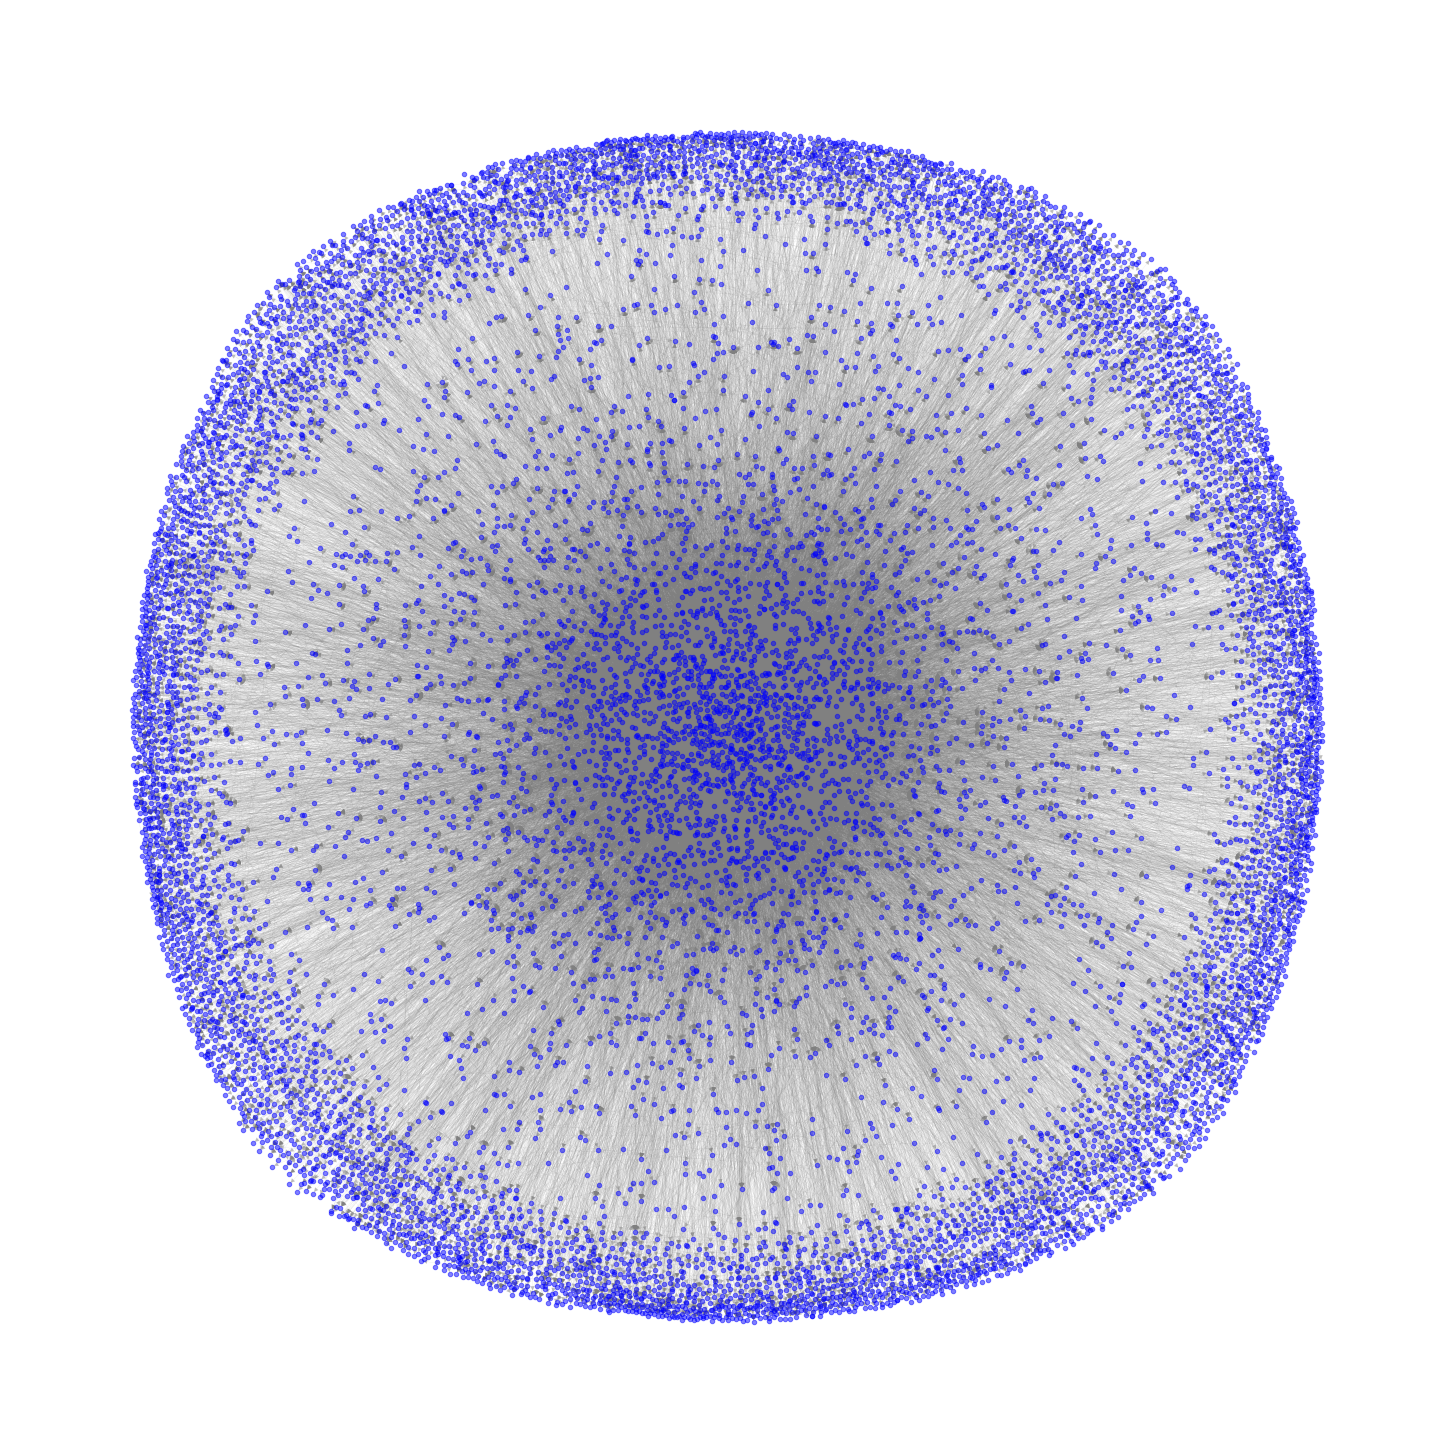

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(G, pos,
        node_size=20, 
        width=0.1,  
        with_labels=False, 
        node_color=node_colors, 
        edge_color='grey',
        alpha=0.5) 

In [ ]:
# plt.savefig("graph.png", dpi=300, bbox_inches="tight")
# plt.show()

<Figure size 432x288 with 0 Axes>